In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow import keras
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
print(keras.__version__)
import tensorflow
print(tensorflow.__version__)
from tensorflow.keras.layers.experimental import preprocessing

2.7.0
2.7.0


In [70]:
import pandas as pd

def load_data(data_path='data'):
    train_csv_path = os.path.join(data_path, "train.csv")
    test_csv_path = os.path.join(data_path, "test.csv")
    return pd.read_csv(train_csv_path, index_col='Id'), pd.read_csv(test_csv_path, index_col='Id')

train, test = load_data()

/home/marek/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [71]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [72]:
train['Distance_To_Hydrology'] = (train['Horizontal_Distance_To_Hydrology']**2 + 
                                 train['Vertical_Distance_To_Hydrology']**2)**0.5

test['Distance_To_Hydrology'] = (test['Horizontal_Distance_To_Hydrology']**2 + 
                                 test['Vertical_Distance_To_Hydrology']**2)**0.5

In [73]:
train[[
    'Cover_Type',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Distance_To_Hydrology',
]].corr()

,Cover_Type,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Distance_To_Hydrology
Cover_Type,1.000000,0.012712,0.033007,0.016334
Horizontal_Distance_To_Hydrology,0.012712,1.000000,0.016022,0.987679
Vertical_Distance_To_Hydrology,0.033007,0.016022,1.000000,0.145931
Distance_To_Hydrology,0.016334,0.987679,0.145931,1.000000


In [74]:
train.drop(['Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)
test.drop(['Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)

In [75]:
# train.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis=1, inplace=True)
# test.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis=1, inplace=True)

In [76]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'Distance_To

In [77]:
train['Horizontal_Distance_To_Roadways'] = abs(train['Horizontal_Distance_To_Roadways'])
test['Horizontal_Distance_To_Roadways'] = abs(test['Horizontal_Distance_To_Roadways'])

train['Horizontal_Distance_To_Fire_Points'] = abs(train['Horizontal_Distance_To_Fire_Points'])
test['Horizontal_Distance_To_Fire_Points'] = abs(test['Horizontal_Distance_To_Fire_Points'])

In [78]:
train['Slope'] = abs(train['Slope'])
test['Slope'] = abs(test['Slope'])

In [79]:
train.loc[train.Cover_Type==5].index

Int64Index([3403875], dtype='int64', name='Id')

In [80]:
train.drop(train.loc[train.Cover_Type==5].index, axis=0, inplace=True)

In [81]:
train.shape

(3999999, 54)

In [82]:
num_classes = train['Cover_Type'].nunique()
input_shape = (train.shape[1]-1)

In [83]:
train['Cover_Type'].nunique()

6

In [84]:
y_train = train['Cover_Type']

In [85]:
train.drop('Cover_Type', axis=1, inplace=True)

In [86]:
train.shape

(3999999, 53)

In [87]:
test.shape

(1000000, 53)

In [88]:
y_binary = to_categorical(y_train.values-1)

In [89]:
y_pd = pd.get_dummies(y_train)

In [90]:
y_binary.shape

(3999999, 7)

In [91]:
y_pd

,1,2,3,4,6,7
Id,,,,,,
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
3999995,0,1,0,0,0,0
3999996,0,1,0,0,0,0
3999997,0,1,0,0,0,0


In [92]:
input_shape

53

In [93]:
train.loc[train.Aspect<0, 'Aspect'] = train.loc[train.Aspect<0, 'Aspect'] + 360.0

In [94]:
train.loc[train.Aspect>360, 'Aspect'] = train.loc[train.Aspect>360.0, 'Aspect'] - 360.0

In [95]:
test.loc[test.Aspect<0, 'Aspect'] = test.loc[test.Aspect<0, 'Aspect'] + 360.0
test.loc[test.Aspect>360, 'Aspect'] = test.loc[test.Aspect>360.0, 'Aspect'] - 360.0

In [96]:
train.loc[train.Hillshade_9am<0, 'Hillshade_9am'] = 0
train.loc[train.Hillshade_9am>255, 'Hillshade_9am'] = 255
train.loc[train.Hillshade_Noon<0, 'Hillshade_Noon'] = 0
train.loc[train.Hillshade_Noon>255, 'Hillshade_Noon'] = 255
train.loc[train.Hillshade_3pm<0, 'Hillshade_3pm'] = 0
train.loc[train.Hillshade_3pm>255, 'Hillshade_3pm'] = 255

test.loc[test.Hillshade_9am<0, 'Hillshade_9am'] = 0
test.loc[test.Hillshade_9am>255, 'Hillshade_9am'] = 255
test.loc[test.Hillshade_Noon<0, 'Hillshade_Noon'] = 0
test.loc[test.Hillshade_Noon>255, 'Hillshade_Noon'] = 255
test.loc[test.Hillshade_3pm<0, 'Hillshade_3pm'] = 0
test.loc[test.Hillshade_3pm>255, 'Hillshade_3pm'] = 255

In [97]:
from sklearn.preprocessing import RobustScaler

In [98]:
transformer = RobustScaler().fit(train)

In [99]:
train = transformer.transform(train)

In [100]:
test = transformer.transform(test)

In [101]:
model = keras.Sequential([
    layers.InputLayer(input_shape=[input_shape]),
    
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(num_classes, activation='softmax'),
])


In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               13824     
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 256)              

In [103]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

In [104]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

In [105]:
batch_size = 1024
epochs = 200

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train, 
                    y_pd, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    callbacks=[early_stopping], 
                    validation_split=0.2,
                    workers=8,
                    use_multiprocessing=True,
                   )


Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3124/3125 [============================>.] - ETA: 0s - loss: 0.1690 - categorical_accuracy: 0.9347WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ffaf7c03d40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VE

3125/3125 [==============================] - 37s 12ms/step - loss: 0.0849 - categorical_accuracy: 0.9602 - val_loss: 0.0868 - val_categorical_accuracy: 0.9589
Epoch 38/200
3125/3125 [==============================] - 38s 12ms/step - loss: 0.0849 - categorical_accuracy: 0.9603 - val_loss: 0.0864 - val_categorical_accuracy: 0.9590
Epoch 39/200
3125/3125 [==============================] - 73s 23ms/step - loss: 0.0848 - categorical_accuracy: 0.9603 - val_loss: 0.0868 - val_categorical_accuracy: 0.9589
Epoch 40/200
3125/3125 [==============================] - 36s 11ms/step - loss: 0.0848 - categorical_accuracy: 0.9602 - val_loss: 0.0868 - val_categorical_accuracy: 0.9587
Epoch 41/200
3125/3125 [==============================] - 37s 12ms/step - loss: 0.0848 - categorical_accuracy: 0.9603 - val_loss: 0.0861 - val_categorical_accuracy: 0.9591
Epoch 42/200
3125/3125 [==============================] - 42s 14ms/step - loss: 0.0846 - categorical_accuracy: 0.9604 - val_loss: 0.0864 - val_categorica

Epoch 85/200
3125/3125 [==============================] - 42s 13ms/step - loss: 0.0824 - categorical_accuracy: 0.9609 - val_loss: 0.0847 - val_categorical_accuracy: 0.9591
Epoch 86/200
3125/3125 [==============================] - 62s 20ms/step - loss: 0.0824 - categorical_accuracy: 0.9609 - val_loss: 0.0850 - val_categorical_accuracy: 0.9590
Epoch 87/200
3125/3125 [==============================] - 32s 10ms/step - loss: 0.0822 - categorical_accuracy: 0.9610 - val_loss: 0.0849 - val_categorical_accuracy: 0.9592
Epoch 88/200
3125/3125 [==============================] - 32s 10ms/step - loss: 0.0823 - categorical_accuracy: 0.9610 - val_loss: 0.0854 - val_categorical_accuracy: 0.9591
Epoch 89/200
3125/3125 [==============================] - 32s 10ms/step - loss: 0.0821 - categorical_accuracy: 0.9610 - val_loss: 0.0848 - val_categorical_accuracy: 0.9593
Epoch 90/200
3125/3125 [==============================] - 31s 10ms/step - loss: 0.0821 - categorical_accuracy: 0.9610 - val_loss: 0.0849 - v

3125/3125 [==============================] - 32s 10ms/step - loss: 0.0812 - categorical_accuracy: 0.9613 - val_loss: 0.0842 - val_categorical_accuracy: 0.9594
Epoch 133/200
3125/3125 [==============================] - 32s 10ms/step - loss: 0.0812 - categorical_accuracy: 0.9611 - val_loss: 0.0840 - val_categorical_accuracy: 0.9593
Epoch 134/200
3125/3125 [==============================] - 36s 11ms/step - loss: 0.0811 - categorical_accuracy: 0.9612 - val_loss: 0.0839 - val_categorical_accuracy: 0.9595


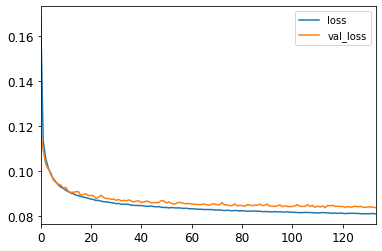

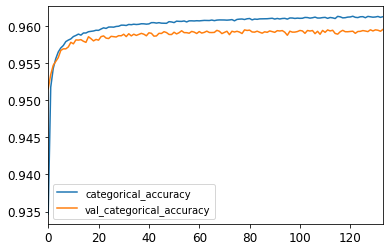

In [106]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot()
# plt.ylim([0.985, 1.0])

In [107]:
predictions = model.predict(test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [108]:
predictions[0]

array([5.5191215e-08, 9.9998987e-01, 1.0154578e-05, 1.8762932e-12,
       1.6157756e-09, 9.0504597e-11], dtype=float32)

In [112]:
y_pd.columns.tolist()[predictions[0].argmax()]

2

In [113]:
predictions_cat_indx = predictions.argmax(axis=1)

In [114]:
predictions_cat_indx

array([1, 1, 1, ..., 1, 0, 2])

In [115]:
predictions_cat = [y_pd.columns.tolist()[pred] for pred in predictions_cat_indx]

In [117]:
predictions_cat[:5]

[2, 2, 2, 2, 2]

In [118]:
len(predictions_cat)

1000000

In [119]:
sub = pd.DataFrame({'Id': list(range(4000000,5000000)), 'Cover_Type': predictions_cat})
sub.shape

(1000000, 2)

In [120]:
sub.to_csv("data/submission_09_euclidean_dist_and_no_2_soil.csv", index=False)

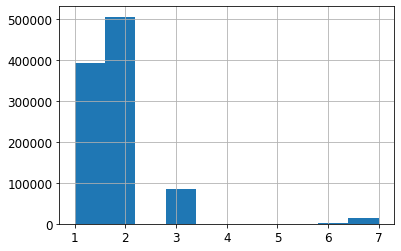

In [30]:
sub['Cover_Type'].hist()